In [1]:
import numpy as np

data= np.load('data.npy')
target=np.load('target.npy')

In [2]:
from keras.models import Sequential,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D,Activation,MaxPooling2D
from keras.utils.np_utils import normalize
from keras.layers import Concatenate
from keras import Input
from keras.callbacks import ModelCheckpoint

from keras.layers import Embedding


from keras.layers import  Conv1D, SpatialDropout1D, MaxPooling1D,AveragePooling1D, merge


model = Sequential()


model.add(Conv2D(256,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dropout(0.6))
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.6))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.6))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.6))
model.add(Dense(2,input_dim=256,activation='sigmoid'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 256)       2560      
_________________________________________________________________
activation (Activation)      (None, 98, 98, 256)       0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 256)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 128)       295040    
_________________________________________________________________
activation_1 (Activation)    (None, 47, 47, 128)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 21, 64)        7

In [10]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.2)

In [11]:
checkpoint = ModelCheckpoint('weights/model-{epoch:03d}.h5',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history=model.fit(train_data,train_target,epochs=20,callbacks=[checkpoint],validation_split=0.2)

Epoch 1/20
44/44 [==============================] - 7s 160ms/step - loss: 0.0600 - accuracy: 0.9841 - val_loss: 0.0408 - val_accuracy: 0.9855
Epoch 2/20
44/44 [==============================] - 7s 158ms/step - loss: 0.0776 - accuracy: 0.9718 - val_loss: 0.0494 - val_accuracy: 0.9884
Epoch 3/20
44/44 [==============================] - 7s 158ms/step - loss: 0.0393 - accuracy: 0.9906 - val_loss: 0.0180 - val_accuracy: 0.9913
Epoch 4/20
44/44 [==============================] - 7s 156ms/step - loss: 0.0342 - accuracy: 0.9891 - val_loss: 0.0096 - val_accuracy: 0.9971
Epoch 5/20
44/44 [==============================] - 7s 156ms/step - loss: 0.0371 - accuracy: 0.9884 - val_loss: 0.0157 - val_accuracy: 0.9913
Epoch 6/20
44/44 [==============================] - 7s 156ms/step - loss: 0.0282 - accuracy: 0.9870 - val_loss: 0.0352 - val_accuracy: 0.9855
Epoch 7/20
44/44 [==============================] - 7s 156ms/step - loss: 0.0197 - accuracy: 0.9957 - val_loss: 0.0279 - val_accuracy: 0.9942
Epoch 

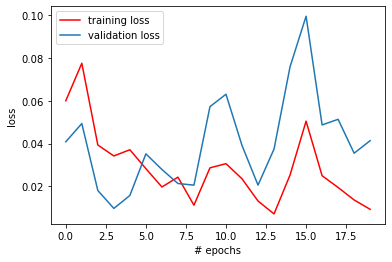

In [12]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

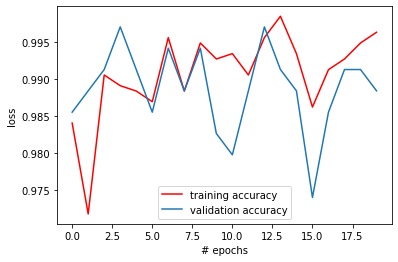

In [13]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [14]:
print(model.evaluate(test_data,test_target))

14/14 [==============================] - 1s 55ms/step - loss: 0.0162 - accuracy: 0.9931
[0.0161905437707901, 0.9930555820465088]
